In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pandas as pd
from model_tool import ToxModel
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import model_tool
import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


HELLO from model_tool


# Intro

This Notebook shows how one can rebalance a dataset and use debiased word embeddings to create fairer classifiers for Toxicity classification. We show that using debiased word embeddings can improve fairness via metrics proposed in http://www.aies-conference.com/wp-content/papers/main/AIES_2018_paper_9.pdf. This Notebook contains code from https://github.com/conversationai/unintended-ml-bias-analysis. And is split up into 3 parts

- Dataset Loading and Model Training
- Evaluate Model Fairness
- Visulize Results

# Dataset Loading and Model Training

In [2]:
SPLITS = ['train', 'dev', 'test']

wiki = {}
debias = {}
random = {}
for split in SPLITS:
    wiki[split] = '../data/toxicity/wiki_%s.csv' % split
    debias[split] = '../data/toxicity/wiki_debias_%s.csv' % split
    random[split] = '../data/toxicity/wiki_debias_random_%s.csv' % split
    
hparams_100 = {
    'max_sequence_length': 250,
    'max_num_words': 10000,
    'embedding_dim': 100,
    'embedding_trainable': False,
    'learning_rate': 0.00005,
    'stop_early': True,
    'es_patience': 1,  # Only relevant if STOP_EARLY = True
    'es_min_delta': 0,  # Only relevant if STOP_EARLY = True
    'batch_size': 128,
    'epochs': 4,
    'dropout_rate': 0.3,
    'cnn_filter_sizes': [128, 128, 128],
    'cnn_kernel_sizes': [5, 5, 5],
    'cnn_pooling_sizes': [5, 5, 40],
    'verbose': True
}

In [3]:
def train_models(name,data,word_embeddings_path,params=[]):
    count = 100
    for i in params:
        model_version = name+"_"+str(count)
        count+=1
        model = ToxModel(hparams=i,embeddings_path = word_embeddings_path)
        print("Training {model_version}")
        model.train(data['train'], data['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = model_version)
        print("Testing Model")
        test = pd.read_csv(data['test'])
        print(model.score_auc(test['comment'], test['is_toxic']))

In [4]:
train_models('wiki_debias_random_cnn_v3',random,'../data/embeddings/glove.6B/glove.6B.100d.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17137, saving model to ../models/wiki_debias_random_cnn_v3_100_model.h5
 - 9s - loss: 0.2374 - acc: 0.9185 - val_loss: 0.1714 - val_acc: 0.9374
Epoch 2/

Epoch 4/4
Epoch 00004: val_loss improved from 0.14421 to 0.13163, saving model to ../models/wiki_debias_random_cnn_v3_104_model.h5
 - 8s - loss: 0.1330 - acc: 0.9516 - val_loss: 0.1316 - val_acc: 0.9511
Model trained!
Best model saved to ../models/wiki_debias_random_cnn_v3_104_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9545563502778047
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0

In [5]:
train_models('wiki_cnn_v3',wiki,'../data/embeddings/glove.6B/glove.6B.100d.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17608, saving model to ../models/wiki_cnn_v3_100_model.h5
 - 11s - loss: 0.2492 - acc: 0.9122 - val_loss: 0.1761 - val_acc: 0.9363
Epoch 2/4
Epoch 00002: val_loss improved from 0.17608 to 0.15303, saving model to ../models/wiki_cnn_v3_100_model.h5
 - 8s - loss: 0.1697 - acc: 0.9376 - val_loss: 0.1530 - val_acc: 0.9439
Epoch 3/4
Epoch 00003: val_loss improved from 0.153

Epoch 3/4
Epoch 00003: val_loss improved from 0.15572 to 0.14965, saving model to ../models/wiki_cnn_v3_105_model.h5
 - 8s - loss: 0.1497 - acc: 0.9444 - val_loss: 0.1497 - val_acc: 0.9462
Epoch 4/4
Epoch 00004: val_loss improved from 0.14965 to 0.14726, saving model to ../models/wiki_cnn_v3_105_model.h5
 - 8s - loss: 0.1374 - acc: 0.9492 - val_loss: 0.1473 - val_acc: 0.9438
Model trained!
Best model saved to ../models/wiki_cnn_v3_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9526247197317076
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embe

In [6]:
train_models('wiki_debias_cnn_v3',debias,'../data/embeddgins/glove.6B/glove.6B.100d.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17032, saving model to ../models/wiki_debias_cnn_v3_100_model.h5
 - 16s - loss: 0.2288 - acc: 0.9211 - val_loss: 0.1703 - val_acc: 0.9394
Epoch 2/4
Epoch 00002: val_loss improved from 0.17032 to 0.14606, saving model to ../models/wiki_debias_cnn_v3_100_model.h5
 - 8s - loss: 0.1614 - acc: 0.9416 - val_loss: 0.1461 - val_acc: 0.9462
Epoch 3/4
Epoch 00003: val_loss impro

Epoch 3/4
Epoch 00003: val_loss improved from 0.14642 to 0.13660, saving model to ../models/wiki_debias_cnn_v3_105_model.h5
 - 8s - loss: 0.1444 - acc: 0.9474 - val_loss: 0.1366 - val_acc: 0.9496
Epoch 4/4
Epoch 00004: val_loss improved from 0.13660 to 0.13178, saving model to ../models/wiki_debias_cnn_v3_105_model.h5
 - 8s - loss: 0.1331 - acc: 0.9517 - val_loss: 0.1318 - val_acc: 0.9523
Model trained!
Best model saved to ../models/wiki_debias_cnn_v3_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9533422435835296
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loadi

In [7]:
train_models('cnn_debias_tox_v3_debiased_WE',debias,'../data/embeddings/glove.6B/glove_debias_new_toxic.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17302, saving model to ../models/cnn_debias_tox_v3_debiased_WE_100_model.h5
 - 22s - loss: 0.2341 - acc: 0.9191 - val_loss: 0.1730 - val_acc: 0.9385
Epoch 2/4
Epoch 00002: val_loss improved from 0.17302 to 0.15689, saving model to ../models/cnn_debias_tox_v3_debiased_WE_100_model.h5
 - 8s - loss: 0.1637 - acc: 0.9406 - val_loss: 0.1569 - val_acc: 0.9445
Epoch 3/4
Epoch

 - 25s - loss: 0.2432 - acc: 0.9126 - val_loss: 0.1695 - val_acc: 0.9386
Epoch 2/4
Epoch 00002: val_loss improved from 0.16947 to 0.15219, saving model to ../models/cnn_debias_tox_v3_debiased_WE_105_model.h5
 - 8s - loss: 0.1647 - acc: 0.9405 - val_loss: 0.1522 - val_acc: 0.9430
Epoch 3/4
Epoch 00003: val_loss improved from 0.15219 to 0.13812, saving model to ../models/cnn_debias_tox_v3_debiased_WE_105_model.h5
 - 8s - loss: 0.1460 - acc: 0.9466 - val_loss: 0.1381 - val_acc: 0.9499
Epoch 4/4
Epoch 00004: val_loss improved from 0.13812 to 0.13297, saving model to ../models/cnn_debias_tox_v3_debiased_WE_105_model.h5
 - 8s - loss: 0.1343 - acc: 0.9508 - val_loss: 0.1330 - val_acc: 0.9519
Model trained!
Best model saved to ../models/cnn_debias_tox_v3_debiased_WE_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.953965179553987
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batc

In [8]:
train_models('we_wiki_cnn',wiki,'../data/embeddings/glove.6B/glove_debias_new_toxic.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.18352, saving model to ../models/we_wiki_cnn_100_model.h5
 - 27s - loss: 0.2420 - acc: 0.9158 - val_loss: 0.1835 - val_acc: 0.9340
Epoch 2/4
Epoch 00002: val_loss improved from 0.18352 to 0.15210, saving model to ../models/we_wiki_cnn_100_model.h5
 - 8s - loss: 0.1678 - acc: 0.9388 - val_loss: 0.1521 - val_acc: 0.9436
Epoch 3/4
Epoch 00003: val_loss improved from 0.152

Epoch 3/4
Epoch 00003: val_loss improved from 0.15446 to 0.14335, saving model to ../models/we_wiki_cnn_105_model.h5
 - 8s - loss: 0.1497 - acc: 0.9447 - val_loss: 0.1434 - val_acc: 0.9472
Epoch 4/4
Epoch 00004: val_loss improved from 0.14335 to 0.13697, saving model to ../models/we_wiki_cnn_105_model.h5
 - 8s - loss: 0.1392 - acc: 0.9487 - val_loss: 0.1370 - val_acc: 0.9499
Model trained!
Best model saved to ../models/we_wiki_cnn_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9529472252232263
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embe

# Evaluate Model Fairness

In [4]:
%%time

MODEL_DIR = '../models/'

wiki_model_names = ['wiki_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
wiki_models = [model_tool.ToxModel(name,model_dir=MODEL_DIR) for name in wiki_model_names]

# random_model_names = ['wiki_debias_random_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
# random_models = [model_tool.ToxModel(name,model_dir=MODEL_DIR) for name in random_model_names]

# debias_model_names = ['wiki_debias_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
# debias_models = [model_tool.ToxModel(name,model_dir=MODEL_DIR) for name in debias_model_names]

# we_debias_model_names = ['cnn_debias_tox_v3_debiased_WE_{}'.format(i) for i in xrange(100, 110)]
# we_debias_models = [model_tool.ToxModel(name,embeddings_path='./glove_debias_new_toxic.txt',model_dir=MODEL_DIR) for name in we_debias_model_names]

# we_wiki_model_names = ['we_wiki_cnn_{}'.format(i) for i in xrange(100, 110)]
# we_wiki_models = [model_tool.ToxModel(name,embeddings_path='./glove_debias_new_toxic.txt',model_dir=MODEL_DIR) for name in we_wiki_model_names]


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_cnn_v3_100
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_cnn_v3_101
max_sequence_length: 250
stop_early: True
embedding_trainable: False



InternalError: Dst tensor is not initialized.
	 [[{{node _arg_Placeholder_43_0_1/_333}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_38__arg_Placeholder_43_0_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

In [10]:
all_model_families = [wiki_models, random_models, debias_models,we_debias_models,we_wiki_models]
all_model_families_names = [wiki_model_names, random_model_names, debias_model_names,we_debias_model_names,we_wiki_model_names]

In [11]:
all_models = wiki_models + random_models + debias_models+ we_debias_models+we_wiki_models

In [12]:
os.remove('../data/toxicity/eval_datasets/bias_madlibs_77k_scored.csv')
madlibs = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/toxicity/eval_datasets/bias_madlibs_77k.csv',
    scored_path='../data/toxicity/eval_datasets/bias_madlibs_77k_scored.csv',
    postprocess_fn=model_tool.postprocess_madlibs,
    )

2019-03-03 20:48:35.135673 Scoring with wiki_cnn_v3_100...
2019-03-03 20:48:52.710055 Scoring with wiki_cnn_v3_101...
2019-03-03 20:49:10.766894 Scoring with wiki_cnn_v3_102...
2019-03-03 20:49:29.013846 Scoring with wiki_cnn_v3_103...
2019-03-03 20:49:47.408187 Scoring with wiki_cnn_v3_104...
2019-03-03 20:50:05.970893 Scoring with wiki_cnn_v3_105...
2019-03-03 20:50:24.547051 Scoring with wiki_cnn_v3_106...
2019-03-03 20:50:43.016746 Scoring with wiki_cnn_v3_107...
2019-03-03 20:51:01.622562 Scoring with wiki_cnn_v3_108...
2019-03-03 20:51:20.125114 Scoring with wiki_cnn_v3_109...
2019-03-03 20:51:38.802426 Scoring with wiki_debias_random_cnn_v3_100...
2019-03-03 20:51:57.391076 Scoring with wiki_debias_random_cnn_v3_101...
2019-03-03 20:52:15.936360 Scoring with wiki_debias_random_cnn_v3_102...
2019-03-03 20:52:34.535008 Scoring with wiki_debias_random_cnn_v3_103...
2019-03-03 20:52:53.087719 Scoring with wiki_debias_random_cnn_v3_104...
2019-03-03 20:53:11.882577 Scoring with wiki_

In [13]:
os.remove('../data/toxicity/wiki_test_scored.csv')
wiki_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/toxicity/wiki_test.csv',
    scored_path='../data/toxicity/wiki_test_scored.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2019-03-03 21:04:16.767360 Scoring with wiki_cnn_v3_100...
2019-03-03 21:04:21.168702 Scoring with wiki_cnn_v3_101...
2019-03-03 21:04:25.725091 Scoring with wiki_cnn_v3_102...
2019-03-03 21:04:30.147827 Scoring with wiki_cnn_v3_103...
2019-03-03 21:04:34.572465 Scoring with wiki_cnn_v3_104...
2019-03-03 21:04:38.984761 Scoring with wiki_cnn_v3_105...
2019-03-03 21:04:43.462867 Scoring with wiki_cnn_v3_106...
2019-03-03 21:04:47.862908 Scoring with wiki_cnn_v3_107...
2019-03-03 21:04:52.359734 Scoring with wiki_cnn_v3_108...
2019-03-03 21:04:56.860464 Scoring with wiki_cnn_v3_109...
2019-03-03 21:05:01.363030 Scoring with wiki_debias_random_cnn_v3_100...
2019-03-03 21:05:05.888181 Scoring with wiki_debias_random_cnn_v3_101...
2019-03-03 21:05:10.350805 Scoring with wiki_debias_random_cnn_v3_102...
2019-03-03 21:05:14.878924 Scoring with wiki_debias_random_cnn_v3_103...
2019-03-03 21:05:19.395017 Scoring with wiki_debias_random_cnn_v3_104...
2019-03-03 21:05:23.961180 Scoring with wiki_

In [14]:
os.remove('../data/toxicity/wiki_debias_test_scored_newest.csv')
os.remove('../data/toxicity/wiki_debias_random_test_scored_newest.csv')

wiki_debias_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/toxicity/wiki_debias_test.csv',
    scored_path='../data/toxicity/wiki_debias_test_scored_newest.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

wiki_random_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/toxicity/wiki_debias_random_test.csv',
    scored_path='../data/toxicity/wiki_debias_random_test_scored_newest.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2019-03-03 21:08:02.360004 Scoring with wiki_cnn_v3_100...
2019-03-03 21:08:06.946656 Scoring with wiki_cnn_v3_101...
2019-03-03 21:08:11.572606 Scoring with wiki_cnn_v3_102...
2019-03-03 21:08:16.111415 Scoring with wiki_cnn_v3_103...
2019-03-03 21:08:20.724370 Scoring with wiki_cnn_v3_104...
2019-03-03 21:08:25.307517 Scoring with wiki_cnn_v3_105...
2019-03-03 21:08:29.965114 Scoring with wiki_cnn_v3_106...
2019-03-03 21:08:34.597887 Scoring with wiki_cnn_v3_107...
2019-03-03 21:08:39.203224 Scoring with wiki_cnn_v3_108...
2019-03-03 21:08:43.810019 Scoring with wiki_cnn_v3_109...
2019-03-03 21:08:48.379465 Scoring with wiki_debias_random_cnn_v3_100...
2019-03-03 21:08:52.958664 Scoring with wiki_debias_random_cnn_v3_101...
2019-03-03 21:08:57.676984 Scoring with wiki_debias_random_cnn_v3_102...
2019-03-03 21:09:02.238865 Scoring with wiki_debias_random_cnn_v3_103...
2019-03-03 21:09:06.889172 Scoring with wiki_debias_random_cnn_v3_104...
2019-03-03 21:09:11.498764 Scoring with wiki_

# Visualize Results

## AUC

original models:
mean AUC: 0.9417902473621217
median: 0.9463670237573649
stddev: 0.012258109572626755


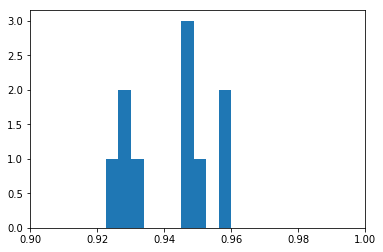



random models:
mean AUC: 0.9456675788992295
median: 0.94649457751381
stddev: 0.005894122576164597


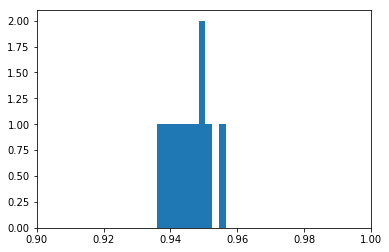



debias models:
mean AUC: 0.9547574622142649
median: 0.9544619904674321
stddev: 0.006578659125761365


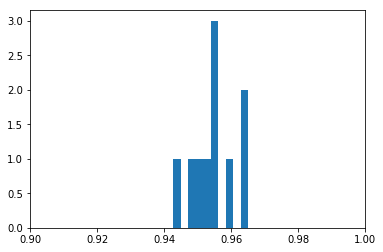



we debias models:
mean AUC: 0.9718270296590313
median: 0.9747741990461483
stddev: 0.00790975783262374


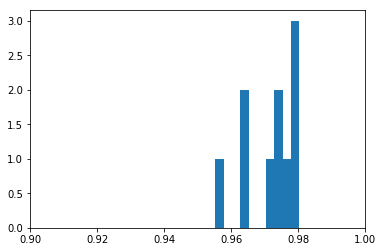



we wiki models:
mean AUC: 0.9716089695177313
median: 0.9721209491833378
stddev: 0.005479249909832567


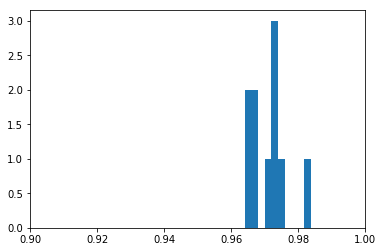

In [15]:
print('original models:')
model_bias_analysis.plot_model_family_auc(madlibs, wiki_model_names, 'label')
print('\n\nrandom models:')
model_bias_analysis.plot_model_family_auc(madlibs, random_model_names, 'label')
print('\n\ndebias models:')
model_bias_analysis.plot_model_family_auc(madlibs, debias_model_names, 'label');
print('\n\nwe debias models:')
model_bias_analysis.plot_model_family_auc(madlibs, we_debias_model_names, 'label');
print('\n\nwe wiki models:')
model_bias_analysis.plot_model_family_auc(madlibs, we_wiki_model_names, 'label');

In [16]:
all_model_families_names

[['wiki_cnn_v3_100',
  'wiki_cnn_v3_101',
  'wiki_cnn_v3_102',
  'wiki_cnn_v3_103',
  'wiki_cnn_v3_104',
  'wiki_cnn_v3_105',
  'wiki_cnn_v3_106',
  'wiki_cnn_v3_107',
  'wiki_cnn_v3_108',
  'wiki_cnn_v3_109'],
 ['wiki_debias_random_cnn_v3_100',
  'wiki_debias_random_cnn_v3_101',
  'wiki_debias_random_cnn_v3_102',
  'wiki_debias_random_cnn_v3_103',
  'wiki_debias_random_cnn_v3_104',
  'wiki_debias_random_cnn_v3_105',
  'wiki_debias_random_cnn_v3_106',
  'wiki_debias_random_cnn_v3_107',
  'wiki_debias_random_cnn_v3_108',
  'wiki_debias_random_cnn_v3_109'],
 ['wiki_debias_cnn_v3_100',
  'wiki_debias_cnn_v3_101',
  'wiki_debias_cnn_v3_102',
  'wiki_debias_cnn_v3_103',
  'wiki_debias_cnn_v3_104',
  'wiki_debias_cnn_v3_105',
  'wiki_debias_cnn_v3_106',
  'wiki_debias_cnn_v3_107',
  'wiki_debias_cnn_v3_108',
  'wiki_debias_cnn_v3_109'],
 ['cnn_debias_tox_v3_debiased_WE_100',
  'cnn_debias_tox_v3_debiased_WE_101',
  'cnn_debias_tox_v3_debiased_WE_102',
  'cnn_debias_tox_v3_debiased_WE_103',
 

In [17]:
for dataset_name, dataset in [('orig test', wiki_test),
                              ('debias test', wiki_debias_test),
                              ('random test', wiki_random_test),
                              ('madlibs', madlibs)]:
    print('\n\nAUCs on', dataset_name)
    for model_family in all_model_families_names:
        fam_name = model_bias_analysis.model_family_name(model_family)
        fam_auc = model_bias_analysis.model_family_auc(dataset, model_family, 'label')
        print('{:30s}  mean {:.4f}\t median {:.4f}\t stddev {:.4f}'.format(fam_name, fam_auc['mean'], fam_auc['median'], fam_auc['std']))



AUCs on orig test
wiki_cnn_v3_10                  mean 0.9529	 median 0.9539	 stddev 0.0032
wiki_debias_random_cnn_v3_10    mean 0.9532	 median 0.9535	 stddev 0.0020
wiki_debias_cnn_v3_10           mean 0.9520	 median 0.9535	 stddev 0.0044
cnn_debias_tox_v3_debiased_WE_10  mean 0.9510	 median 0.9521	 stddev 0.0043
we_wiki_cnn_10                  mean 0.9510	 median 0.9525	 stddev 0.0043


AUCs on debias test
wiki_cnn_v3_10                  mean 0.9506	 median 0.9516	 stddev 0.0030
wiki_debias_random_cnn_v3_10    mean 0.9511	 median 0.9514	 stddev 0.0019
wiki_debias_cnn_v3_10           mean 0.9521	 median 0.9534	 stddev 0.0042
cnn_debias_tox_v3_debiased_WE_10  mean 0.9513	 median 0.9525	 stddev 0.0043
we_wiki_cnn_10                  mean 0.9509	 median 0.9524	 stddev 0.0043


AUCs on random test
wiki_cnn_v3_10                  mean 0.9537	 median 0.9545	 stddev 0.0031
wiki_debias_random_cnn_v3_10    mean 0.9540	 median 0.9543	 stddev 0.0020
wiki_debias_cnn_v3_10           mean 0.9529	

## Per-term pinned AUC

Per-term pinned AUC values show improved scores and less disaprity for the debiased model.

In [18]:
madlibs_terms = model_bias_analysis.read_identity_terms('../data/toxicity/bias_madlibs_data/adjectives_people.txt')

In [19]:
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'text', madlibs_terms)

In [20]:
_raw_term_madlibs_aucs = model_bias_analysis.per_subgroup_aucs(madlibs, madlibs_terms, all_model_families_names, 'label')

per-term AUC histogram: mean AUCs across terms for: wiki_cnn_v3_10_mean


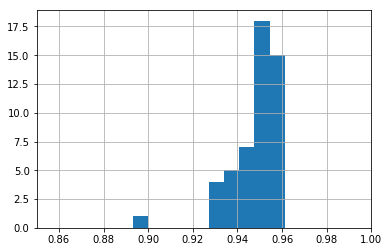

per-term AUC histogram: mean AUCs across terms for: wiki_debias_random_cnn_v3_10_mean


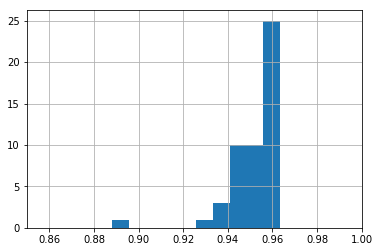

per-term AUC histogram: mean AUCs across terms for: wiki_debias_cnn_v3_10_mean


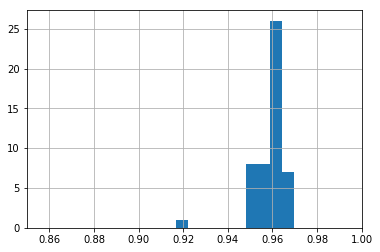

per-term AUC histogram: mean AUCs across terms for: cnn_debias_tox_v3_debiased_WE_10_mean


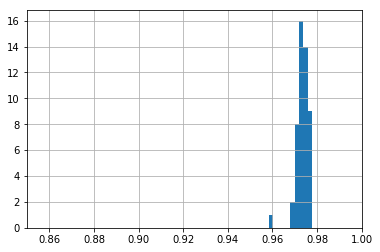

per-term AUC histogram: mean AUCs across terms for: we_wiki_cnn_10_mean


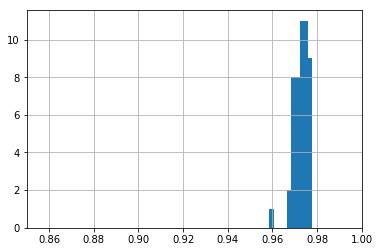

In [21]:
orig_mean = 'wiki_cnn_v3_10_mean'
random_mean = 'wiki_debias_random_cnn_v3_10_mean'
debias_mean= 'wiki_debias_cnn_v3_10_mean'
we_debias_mean = 'cnn_debias_tox_v3_debiased_WE_10_mean'
we_wiki_mean = 'we_wiki_cnn_10_mean'


for mean_col in [orig_mean, random_mean, debias_mean,we_debias_mean,we_wiki_mean]:
    print('per-term AUC histogram: mean AUCs across terms for:', mean_col)
    _raw_term_madlibs_aucs[mean_col].hist()
    plt.gca().set_xlim((0.85, 1.0))
    plt.show()

In [22]:
execfile('model_bias_analysis.py')

wiki_cnn_v3_10_aucs
wiki_debias_random_cnn_v3_10_aucs
wiki_debias_cnn_v3_10_aucs
cnn_debias_tox_v3_debiased_WE_10_aucs
we_wiki_cnn_10_aucs


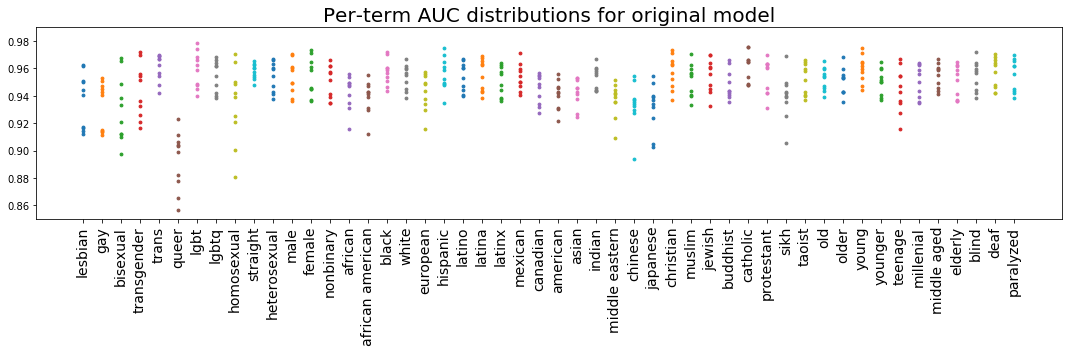

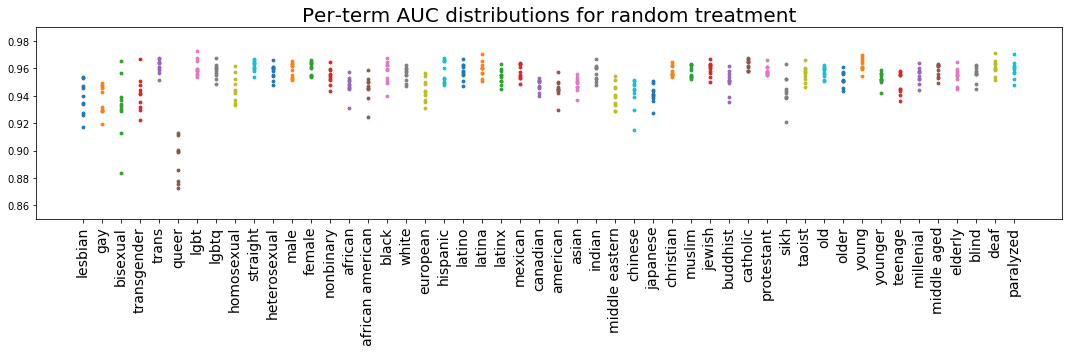

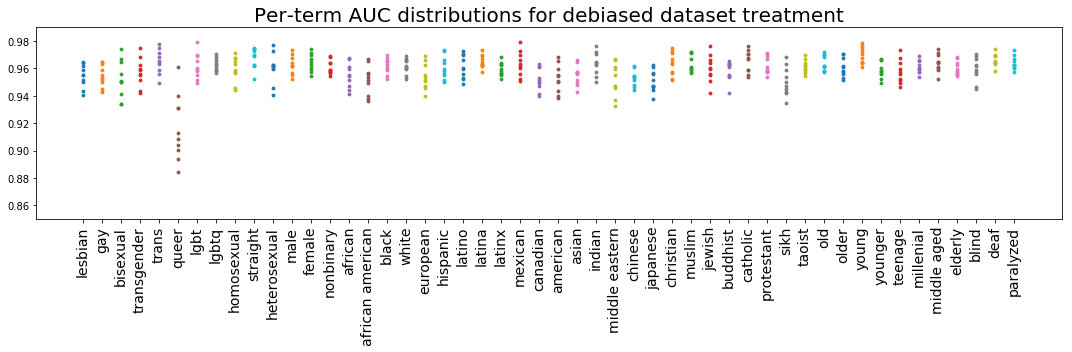

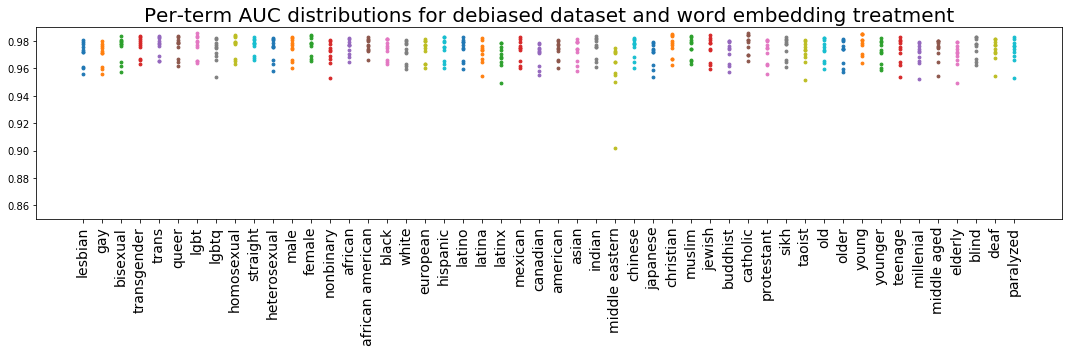

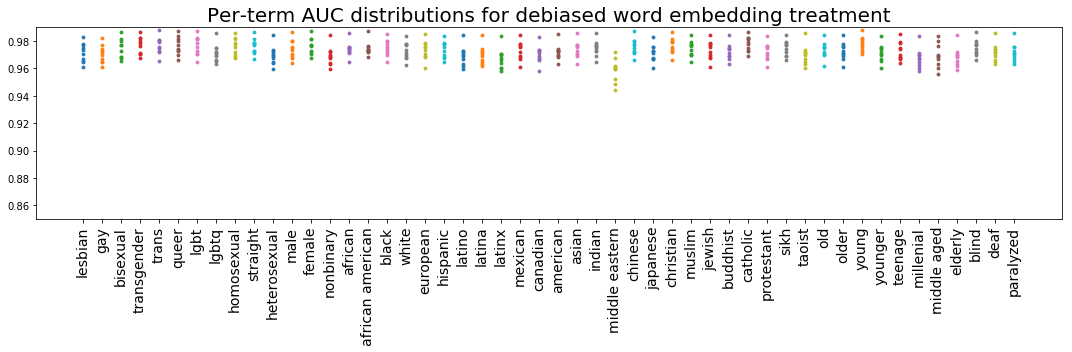

In [52]:
orig_aucs = 'wiki_cnn_v3_10_aucs'
random_aucs = 'wiki_debias_random_cnn_v3_10_aucs'
debias_aucs= 'wiki_debias_cnn_v3_10_aucs'
we_debias_aucs = 'cnn_debias_tox_v3_debiased_WE_10_aucs'
we_wiki_aucs = 'we_wiki_cnn_10_aucs'
for title, auc_collection_col in [('original model',orig_aucs), ('random treatment',random_aucs), ('debiased dataset treatment',debias_aucs),('debiased dataset and word embedding treatment',we_debias_aucs),('debiased word embedding treatment',we_wiki_aucs)]:
    print(auc_collection_col)
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_madlibs_aucs, 'subgroup', auc_collection_col, title='Per-term AUC distributions for ' + title,
        file_name='madlibs',y_lim=(0.85, .99))

### Per-term  AUCs on the wikipedia dataset

In [24]:
model_bias_analysis.add_subgroup_columns_from_text(wiki_test, 'text', madlibs_terms)

In [25]:
%%time
_raw_term_wiki_aucs = model_bias_analysis.per_subgroup_aucs(wiki_test, madlibs_terms, all_model_families_names, 'label')

/home/csweeney/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


CPU times: user 1min 28s, sys: 27.3 ms, total: 1min 28s
Wall time: 1min 28s


We don't see a strong effect in per-term pinned AUCs on the wikipedia test set. This isn't surprising, as the dataset bias affects the test set too: there are few non-toxic examples using the bias terms, and so the AUC of the original models does not suffer.

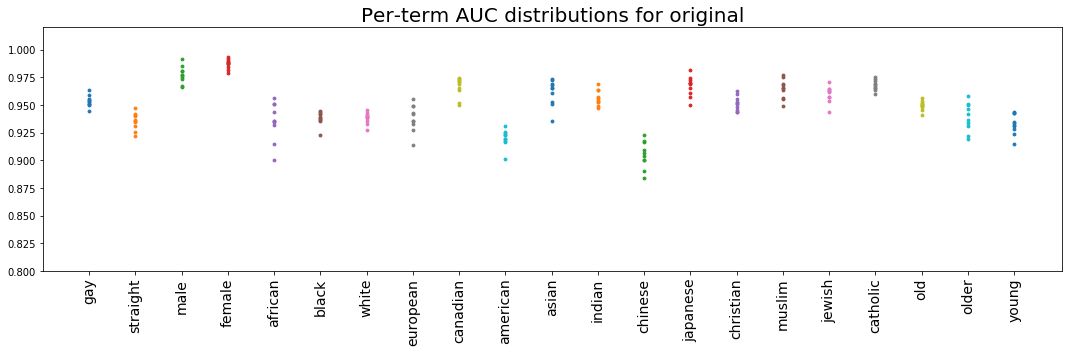

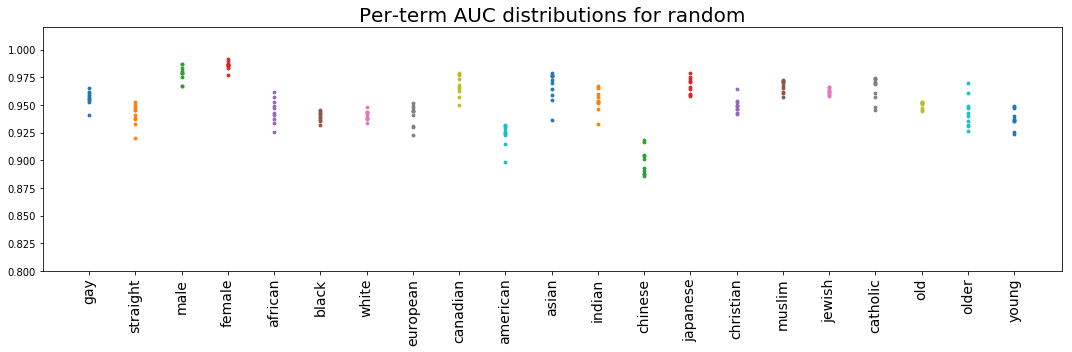

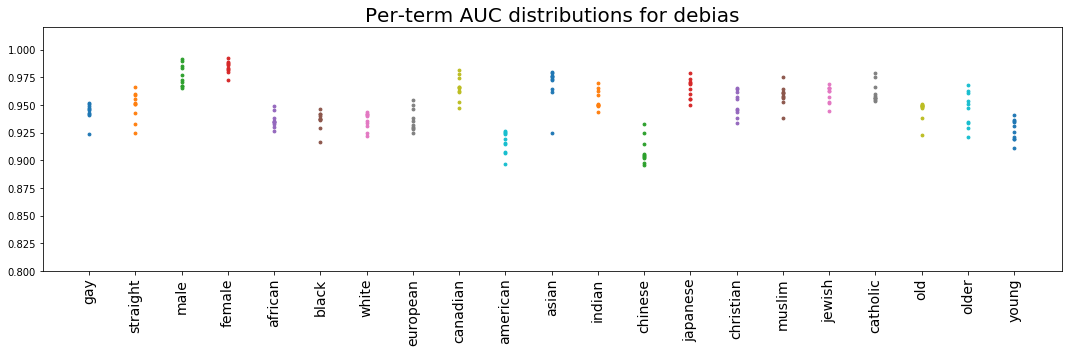

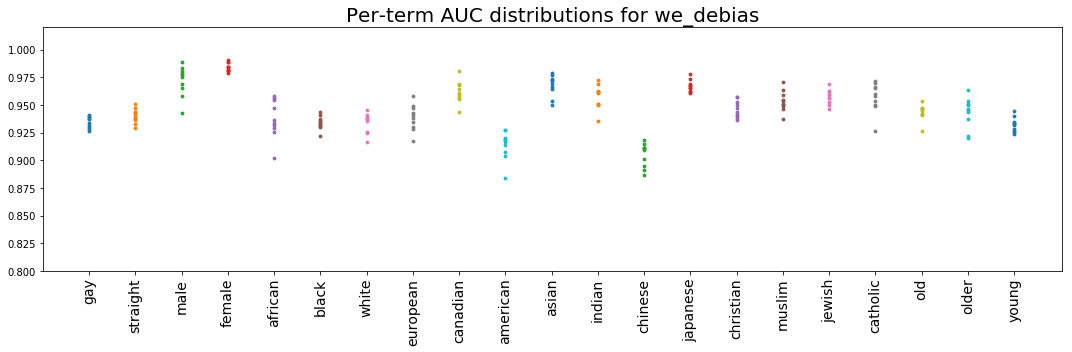

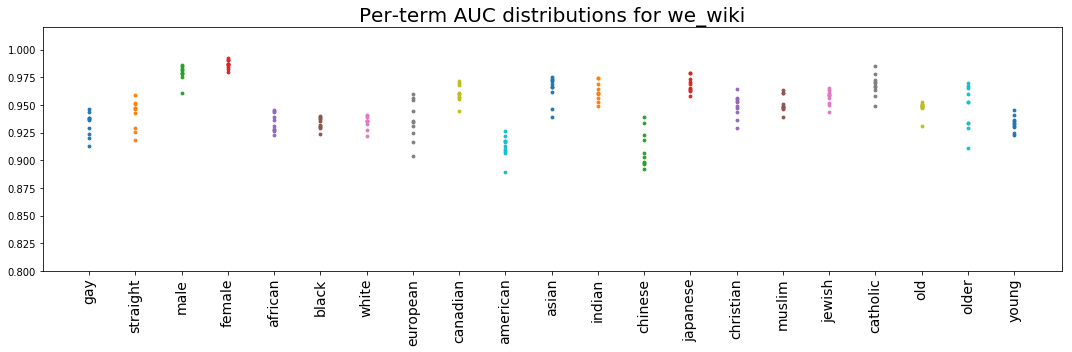

In [26]:
# AUC on tiny datasets is very noisy.
_term_wiki_aucs_nottiny = _raw_term_wiki_aucs[_raw_term_wiki_aucs['subset_size'] > 50]

for title, auc_collection_col in [('original',orig_aucs), ('random',random_aucs), ('debias',debias_aucs),('we_debias',we_debias_aucs),('we_wiki',we_wiki_aucs)]:
    model_bias_analysis.per_subgroup_scatterplots(_term_wiki_aucs_nottiny, 'subgroup', auc_collection_col,
                                              title='Per-term AUC distributions for ' + title, y_lim=(0.8, 1.02),
                                              file_name='wiki')

## Qualitative look

In [27]:
# TODO(jetpack): add column to bias madlibs dataset to allow selecting by template
# to more easily observe discrepancies in scores for the same template.

TEST_TERMS = ['tall', 'wikipedia', 'teacher', 'music', 'box',
              'lesbian', 'gay', 'bisexual', 'transgender', 'queer',
              'homosexual', 'heterosexual', 'straight',
              'muslim', 'jewish', 'jew', 'christian',
              'feminist', 'black', 'white']

def _print_template_scores(models):
    texts = ['i am a {} person'.format(term) for term in TEST_TERMS]
    median_scores = [{'median': np.median([model.predict([text]) for model in models]),
                      'stddev': np.std([model.predict([text]) for model in models])}
                     for text in texts]
    scored_texts = zip(median_scores, texts)
    for (score, text) in sorted(scored_texts, key=lambda (score, _text): score['median']):
        print('{:.3f}  (std: {:.4f})  {}'.format(score['median'], score['stddev'], text))
    plt.hist([x['median'] for x in median_scores])
    plt.gca().set_xlim([0, 1])
    plt.gca().set_ylim([0, 10])

0.021  (std: 0.0267)  i am a music person
0.044  (std: 0.0272)  i am a box person
0.044  (std: 0.0365)  i am a teacher person
0.052  (std: 0.0348)  i am a heterosexual person
0.055  (std: 0.0560)  i am a straight person
0.070  (std: 0.0777)  i am a white person
0.077  (std: 0.0602)  i am a wikipedia person
0.077  (std: 0.0563)  i am a christian person
0.120  (std: 0.0686)  i am a feminist person
0.123  (std: 0.0570)  i am a jewish person
0.123  (std: 0.0397)  i am a muslim person
0.132  (std: 0.0737)  i am a tall person
0.157  (std: 0.1264)  i am a black person
0.307  (std: 0.1287)  i am a gay person
0.322  (std: 0.1538)  i am a transgender person
0.338  (std: 0.1453)  i am a lesbian person
0.406  (std: 0.1590)  i am a bisexual person
0.451  (std: 0.1605)  i am a homosexual person
0.699  (std: 0.1230)  i am a jew person
0.769  (std: 0.1529)  i am a queer person


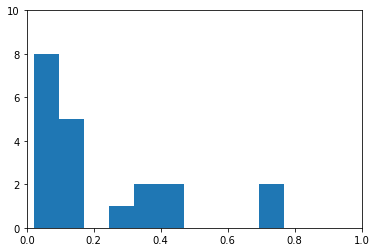

In [28]:
_print_template_scores(wiki_models)

0.020  (std: 0.0124)  i am a music person
0.033  (std: 0.0147)  i am a box person
0.037  (std: 0.0147)  i am a teacher person
0.038  (std: 0.0416)  i am a heterosexual person
0.062  (std: 0.0321)  i am a straight person
0.063  (std: 0.0627)  i am a white person
0.076  (std: 0.0391)  i am a wikipedia person
0.082  (std: 0.0720)  i am a christian person
0.098  (std: 0.0445)  i am a muslim person
0.101  (std: 0.1117)  i am a tall person
0.135  (std: 0.0767)  i am a feminist person
0.137  (std: 0.0866)  i am a jewish person
0.152  (std: 0.1115)  i am a black person
0.358  (std: 0.1932)  i am a gay person
0.408  (std: 0.1762)  i am a transgender person
0.419  (std: 0.1737)  i am a homosexual person
0.433  (std: 0.1748)  i am a lesbian person
0.458  (std: 0.1948)  i am a bisexual person
0.701  (std: 0.1364)  i am a jew person
0.758  (std: 0.1430)  i am a queer person


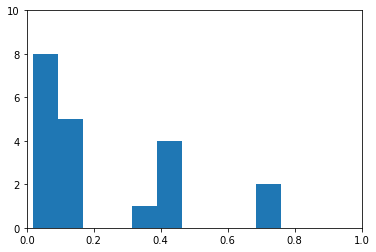

In [29]:
_print_template_scores(random_models)

0.026  (std: 0.0175)  i am a music person
0.048  (std: 0.0561)  i am a box person
0.049  (std: 0.0265)  i am a teacher person
0.070  (std: 0.0411)  i am a wikipedia person
0.070  (std: 0.0652)  i am a white person
0.078  (std: 0.0483)  i am a feminist person
0.080  (std: 0.0653)  i am a christian person
0.093  (std: 0.0887)  i am a straight person
0.100  (std: 0.0803)  i am a muslim person
0.109  (std: 0.0622)  i am a jewish person
0.150  (std: 0.0804)  i am a heterosexual person
0.185  (std: 0.1032)  i am a tall person
0.194  (std: 0.1035)  i am a transgender person
0.205  (std: 0.0777)  i am a gay person
0.238  (std: 0.1315)  i am a black person
0.243  (std: 0.0833)  i am a lesbian person
0.253  (std: 0.1022)  i am a homosexual person
0.323  (std: 0.1287)  i am a bisexual person
0.658  (std: 0.1183)  i am a queer person
0.757  (std: 0.0700)  i am a jew person


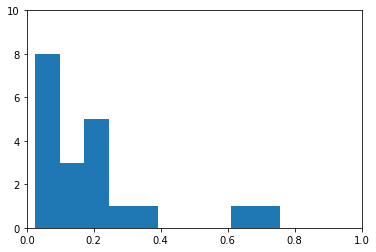

In [30]:
_print_template_scores(debias_models)

### Equality of Opportunity

To evaluate equality of opportunity, we compare false negative rates on a per-term basis.

In [31]:
def neg_table_means(term_neg_rates):
    """Helper to display just the mean values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_fnr_mean',
              'random_fnr_mean',
              'debias_fnr_mean',
              'orig_tnr_mean',
              'random_tnr_mean',
              'debias_tnr_mean',
            ]]
            .sort_values('orig_fnr_mean')
           )

def neg_table_stddevs(term_neg_rates):
    """Helper to display just the standard deviation values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_fnr_mean',  # just for sorting
            ]]
            .sort_values('orig_fnr_mean')
            .drop('orig_fnr_mean', axis=1)
           )

### Threshold 0.5

In [32]:
%%time

# threshold = .50 

_raw_term_neg_rates_50 = model_bias_analysis.per_subgroup_negative_rates(madlibs, madlibs_terms, all_model_families_names, 0.5, 'label')

CPU times: user 6.99 s, sys: 6.28 ms, total: 6.99 s
Wall time: 6.99 s


### Threshold using per-model equal error rate on overall madlibs dataset

In [33]:
%%time

# Compute the equal error rate for all models on the overall madlibs dataset in order to
# compute the false/true negative rates table at the EER for each model.

# Flattened list of all models.
_all_model_names = []
for model_family_names in all_model_families_names:
    _all_model_names.extend(model_family_names)
_model_eers_madlibs = model_bias_analysis.per_model_eer(madlibs, 'label', _all_model_names)

CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s


In [34]:
%%time
_raw_term_neg_rates_madlibs_eer = model_bias_analysis.per_subgroup_negative_rates(
    madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, 'label')

CPU times: user 6.99 s, sys: 14.7 ms, total: 7.01 s
Wall time: 7.03 s


In [35]:
_raw_term_neg_rates_madlibs_eer.columns

Index([u'cnn_debias_tox_v3_debiased_WE_10_fnr_mean',
       u'cnn_debias_tox_v3_debiased_WE_10_fnr_median',
       u'cnn_debias_tox_v3_debiased_WE_10_fnr_std',
       u'cnn_debias_tox_v3_debiased_WE_10_fnr_values',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_mean',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_median',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_std',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_values', u'subgroup',
       u'subset_size', u'we_wiki_cnn_10_fnr_mean',
       u'we_wiki_cnn_10_fnr_median', u'we_wiki_cnn_10_fnr_std',
       u'we_wiki_cnn_10_fnr_values', u'we_wiki_cnn_10_tnr_mean',
       u'we_wiki_cnn_10_tnr_median', u'we_wiki_cnn_10_tnr_std',
       u'we_wiki_cnn_10_tnr_values', u'wiki_cnn_v3_10_fnr_mean',
       u'wiki_cnn_v3_10_fnr_median', u'wiki_cnn_v3_10_fnr_std',
       u'wiki_cnn_v3_10_fnr_values', u'wiki_cnn_v3_10_tnr_mean',
       u'wiki_cnn_v3_10_tnr_median', u'wiki_cnn_v3_10_tnr_std',
       u'wiki_cnn_v3_10_tnr_values', u'wiki_debias_cnn_

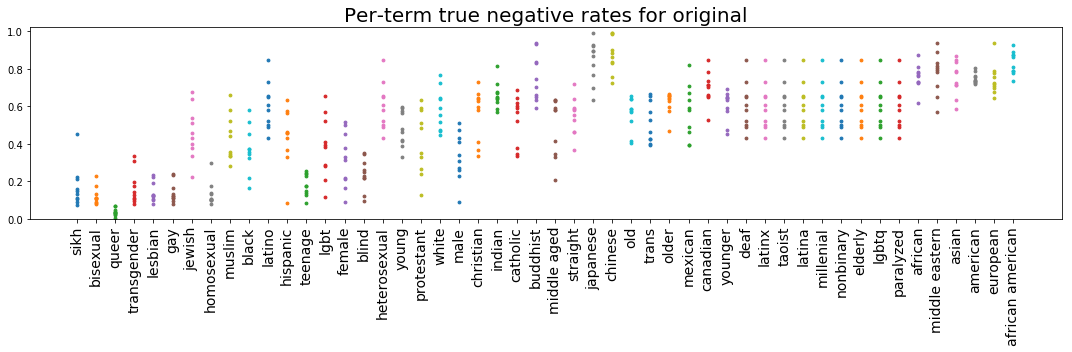

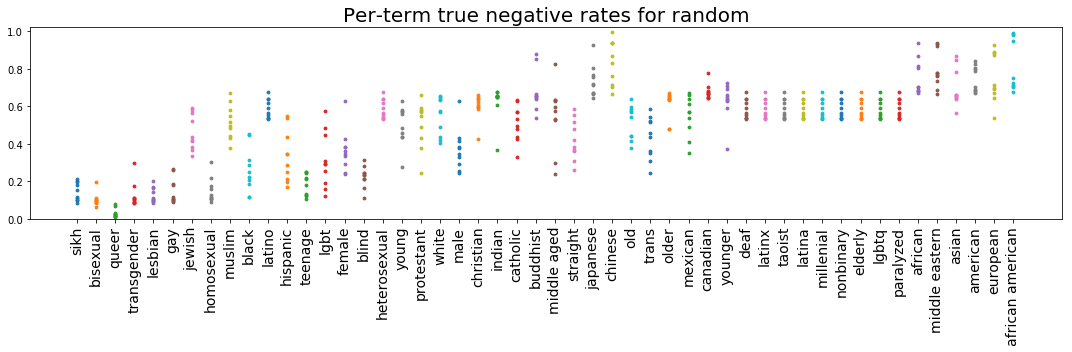

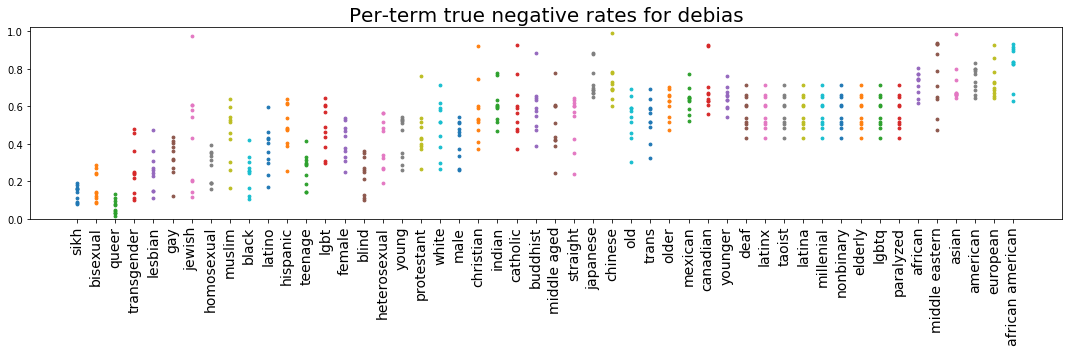

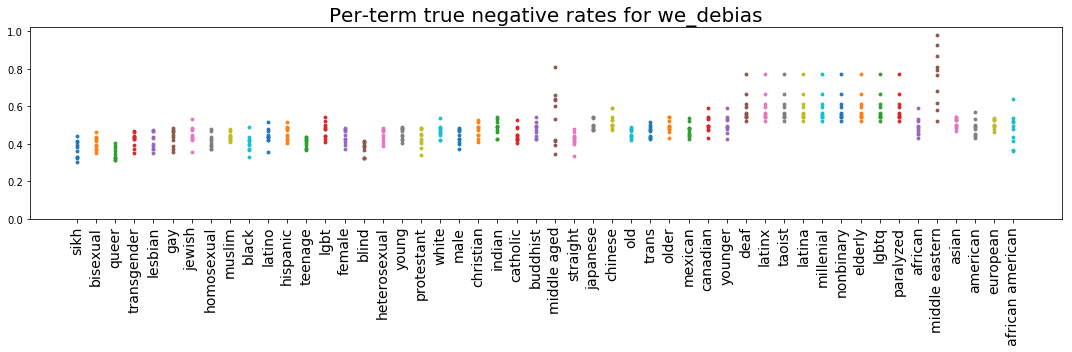

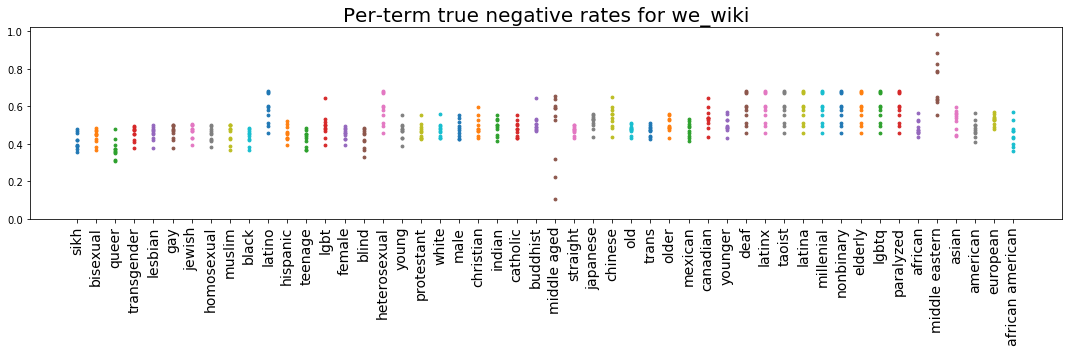

In [36]:
# True negative rates: TN / (TN + FP)

_raw_term_neg_rates_madlibs_eer_sorted = _raw_term_neg_rates_madlibs_eer.sort_values('wiki_debias_cnn_v3_10_tnr_values')
orig_tnr = 'wiki_cnn_v3_10_tnr_values'
random_tnr = 'wiki_debias_random_cnn_v3_10_tnr_values'
debias_tnr= 'wiki_debias_cnn_v3_10_tnr_values'
we_debias_tnr = 'cnn_debias_tox_v3_debiased_WE_10_tnr_values'
we_wiki_tnr = 'we_wiki_cnn_10_tnr_values'
for title, tnr_values_col in [('original',orig_tnr), ('random',random_tnr), ('debias',debias_tnr),('we_debias',we_debias_tnr),('we_wiki',we_wiki_tnr)]:
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_neg_rates_madlibs_eer_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
        title='Per-term true negative rates for ' + title, file_name='madlibs')

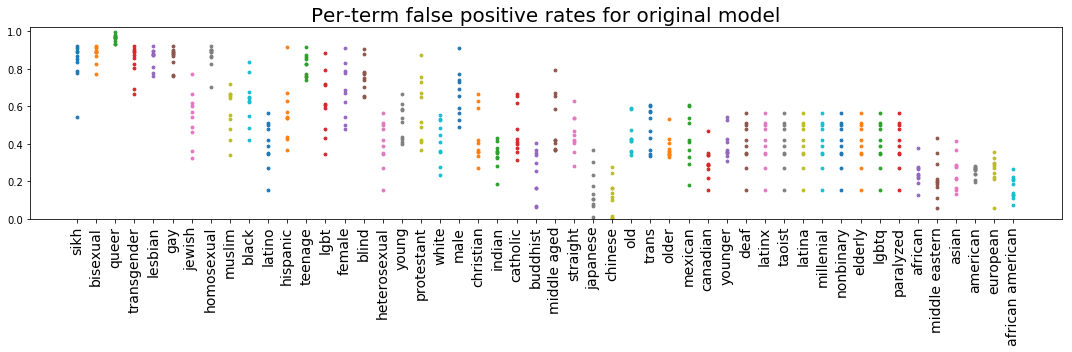

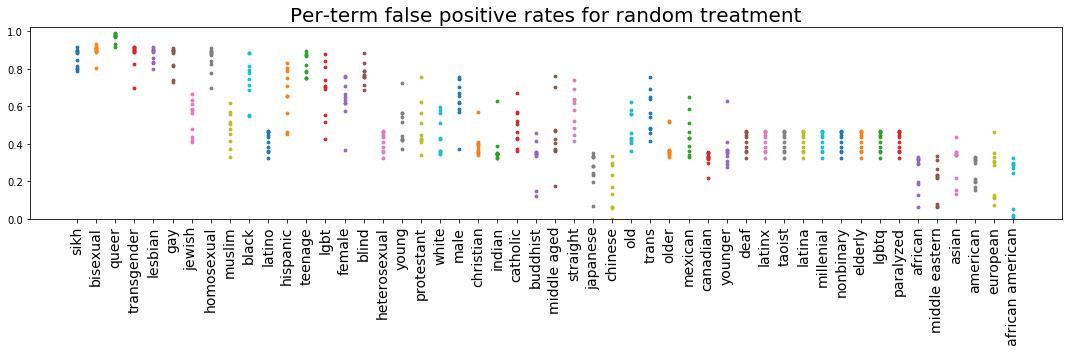

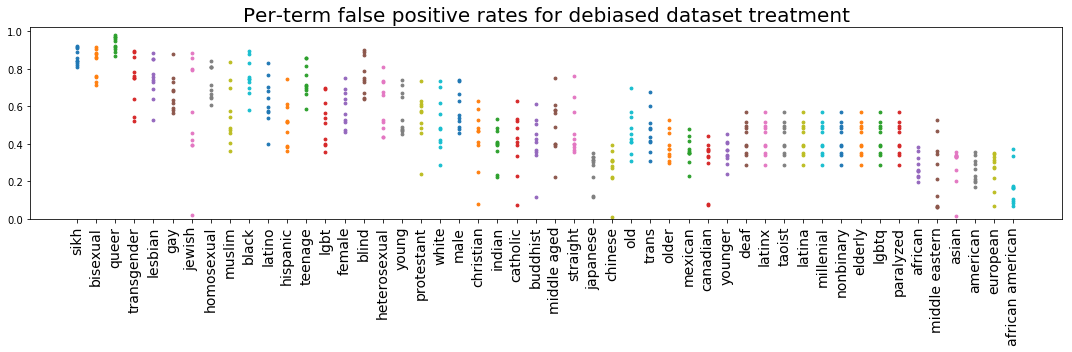

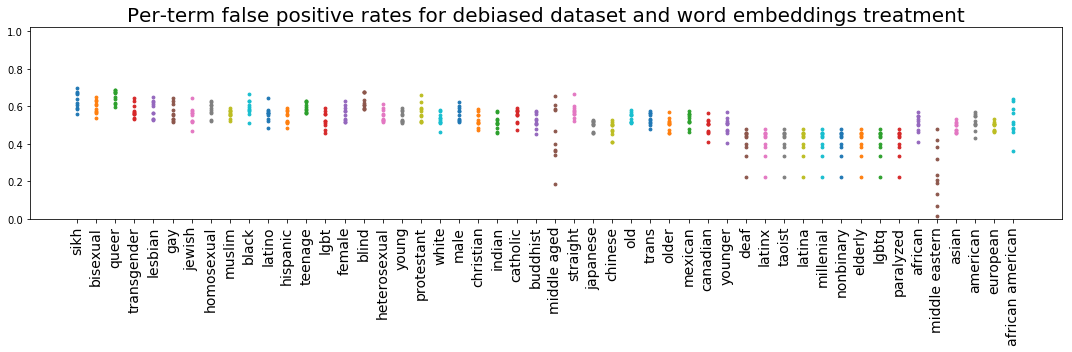

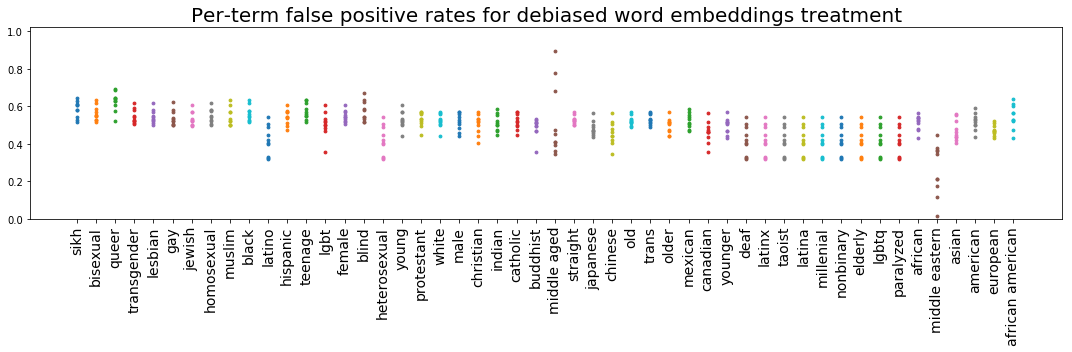

In [53]:
# False positive rates: 1 - TNR. This is just the above graphs except flipped to show false positives instead of true negatives.

# _term_neg_rates_madlibs_eer_tnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model',orig_tnr), ('random treatment',random_tnr), ('debiased dataset treatment',debias_tnr),('debiased dataset and word embeddings treatment',we_debias_tnr),('debiased word embeddings treatment',we_wiki_tnr)]:
    term_fpr_values = []
    for _i, row in _raw_term_neg_rates_madlibs_eer_sorted.iterrows():
        tnr_values = row[tnr_values_col]
        fpr_values = [1 - tnr for tnr in tnr_values]
        term_fpr_values.append({'subgroup': row['subgroup'], 'fpr_values': fpr_values})
    fpr_df = pd.DataFrame(term_fpr_values)
    model_bias_analysis.per_subgroup_scatterplots(
        fpr_df, 'subgroup', 'fpr_values', y_lim=(0, 1.02),
        title='Per-term false positive rates for ' + title,
        file_name='madlibs_' + tnr_values_col)

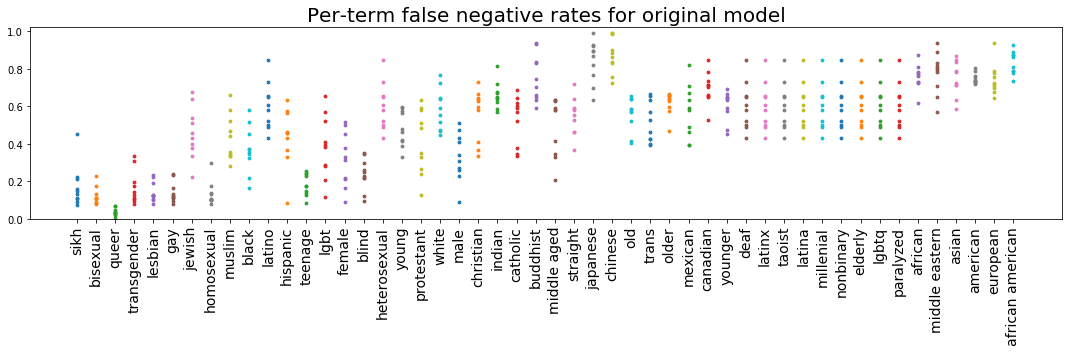

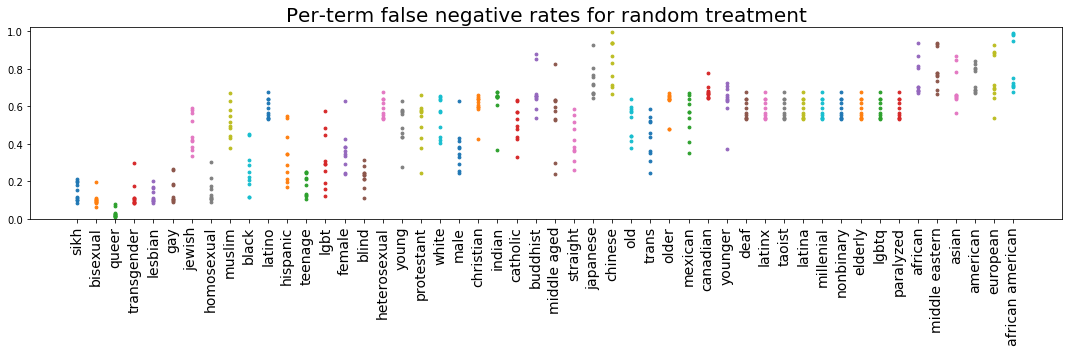

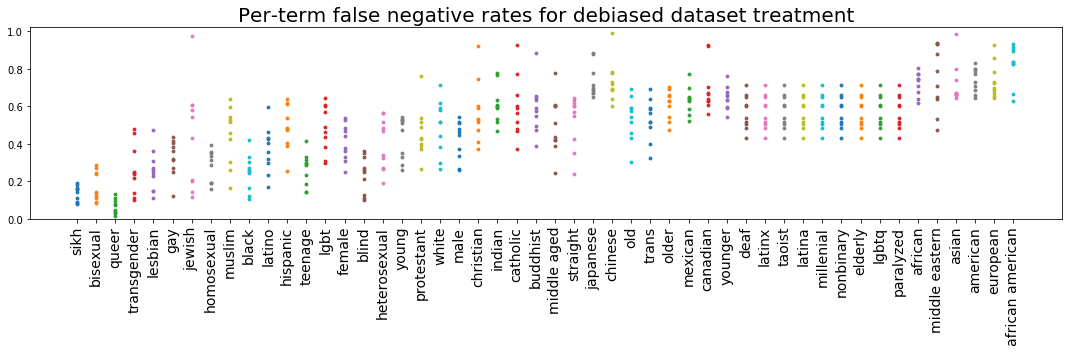

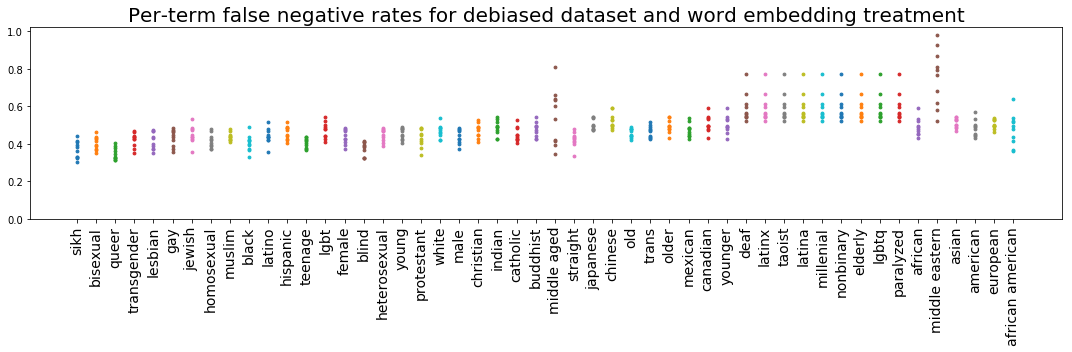

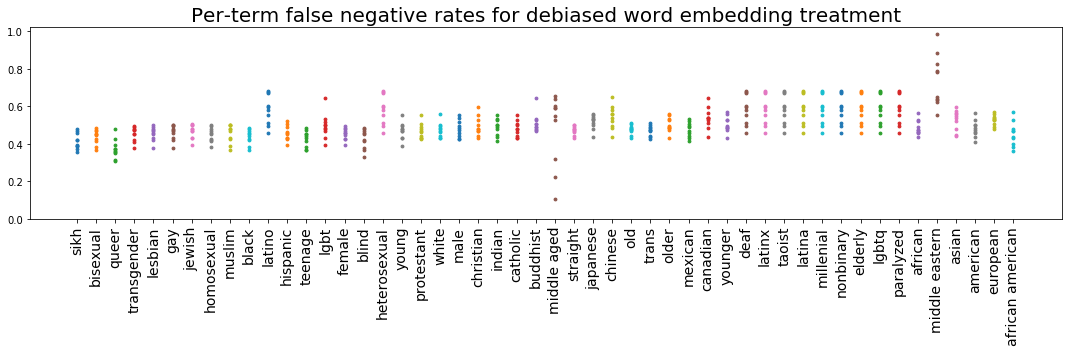

In [54]:
# False negative rates: FN / (FN + TP). 1 - TPR.

# Should we use the same ordering as the true negative rate plots?
_raw_term_neg_rates_madlibs_eer_sorted = _raw_term_neg_rates_madlibs_eer.sort_values('wiki_debias_cnn_v3_10_fnr_values')
orig_fnr = 'wiki_cnn_v3_10_fnr_values'
random_fnr = 'wiki_debias_random_cnn_v3_10_fnr_values'
debias_fnr= 'wiki_debias_cnn_v3_10_fnr_values'
we_debias_fnr = 'cnn_debias_tox_v3_debiased_WE_10_fnr_values'
we_wiki_fnr = 'we_wiki_cnn_10_fnr_values'
for title, fnr_values_col in [('original model',orig_fnr), ('random treatment',random_fnr), ('debiased dataset treatment',debias_fnr),('debiased dataset and word embedding treatment',we_debias_fnr),('debiased word embedding treatment',we_wiki_fnr)]:
    #_term_neg_rates_madlibs_eer_fnr_sorted
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_neg_rates_madlibs_eer_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
        title='Per-term false negative rates for ' + title,
        file_name='madlibs')

### Threshold using per-model equal error rate on Wikipedia test set

The EERs computed on the wikipedia test set are similar, and so we don't see much difference in the per-term negative rates plots.

In [39]:
# %%time

# # Compute the equal error rate for all models on the wikipedia dataset.

# _model_eers_wiki = model_bias_analysis.per_model_eer(wiki_test, 'label', _all_model_names)

In [40]:
# %%time
# _raw_term_neg_rates_wiki_eer = model_bias_analysis.per_subgroup_negative_rates(
#     madlibs, madlibs_terms, all_model_families_names, _model_eers_wiki, 'label')
# _term_neg_rates_wiki_eer = _raw_term_neg_rates_wiki_eer.rename(columns=column_renamer)

In [41]:
# # True negative rates: TN / (TN + FP)

# _term_neg_rates_wiki_eer_tnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_tnr_mean')

# for title, tnr_values_col in [('original model', 'orig_tnr_values'),
#                               ('random treatment', 'random_tnr_values'),
#                               ('debiasing treatment', 'debias_tnr_values')]:
#     model_bias_analysis.per_subgroup_scatterplots(
#         _term_neg_rates_wiki_eer_tnr_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
#         title='Per-term true negative rates for ' + title, file_name='wiki')

In [42]:
# # False negative rates: FN / (FN + TP). 1 - TPR.

# # Should we use the same ordering as the true negative rate plots?
# _term_neg_rates_wiki_eer_fnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_fnr_mean')

# for title, fnr_values_col in [('original model', 'orig_fnr_values'),
#                               ('random treatment', 'random_fnr_values'),
#                               ('debiasing treatment', 'debias_fnr_values')]:
#     model_bias_analysis.per_subgroup_scatterplots(
#         _term_neg_rates_wiki_eer_fnr_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
#         title='Per-term false negative rates for ' + title, file_name='wiki')

In [43]:
# all_model_families_names print

In [44]:
model_bias_analysis.per_subgroup_fnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, .5, False)

,model_family,fnr_equality_difference
0,we_wiki_cnn_10,9.409343
1,wiki_cnn_v3_10,20.998782
2,wiki_debias_cnn_v3_10,18.944092
3,wiki_debias_random_cnn_v3_10,17.891065
4,cnn_debias_tox_v3_debiased_WE_10,6.808067


In [45]:
model_bias_analysis.per_subgroup_tnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, .5, False)

,model_family,tnr_equality_difference
0,we_wiki_cnn_10,9.409343
1,wiki_cnn_v3_10,20.998782
2,wiki_debias_cnn_v3_10,18.944092
3,wiki_debias_random_cnn_v3_10,17.891065
4,cnn_debias_tox_v3_debiased_WE_10,6.808067


In [46]:
model_bias_analysis.per_subgroup_auc_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, False)

,model_family,pinned_auc_equality_difference
0,we_wiki_cnn_10,1.768195
1,wiki_cnn_v3_10,5.900542
2,wiki_debias_cnn_v3_10,3.755818
3,wiki_debias_random_cnn_v3_10,5.519952
4,cnn_debias_tox_v3_debiased_WE_10,1.533727


# new

In [47]:
model_bias_analysis.per_subgroup_auc_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, False)

,model_family,pinned_auc_equality_difference
0,we_wiki_cnn_10,1.768195
1,wiki_cnn_v3_10,5.900542
2,wiki_debias_cnn_v3_10,3.755818
3,wiki_debias_random_cnn_v3_10,5.519952
4,cnn_debias_tox_v3_debiased_WE_10,1.533727


In [48]:
model_bias_analysis.per_subgroup_fnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs,False)

,model_family,fnr_equality_difference
0,we_wiki_cnn_10,31.345629
1,wiki_cnn_v3_10,96.266545
2,wiki_debias_cnn_v3_10,83.048697
3,wiki_debias_random_cnn_v3_10,93.213257
4,cnn_debias_tox_v3_debiased_WE_10,33.371919


In [49]:
model_bias_analysis.per_subgroup_tnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, False)

,model_family,tnr_equality_difference
0,we_wiki_cnn_10,31.345629
1,wiki_cnn_v3_10,96.266545
2,wiki_debias_cnn_v3_10,83.048697
3,wiki_debias_random_cnn_v3_10,93.213257
4,cnn_debias_tox_v3_debiased_WE_10,33.371919


In [50]:
tp
for index, row in madlibs.iterrows():
    print(row)
    break

NameError: name 'tp' is not defined